In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Costanti fisiche
sigma = 5.67e-8  # Costante di Stefan-Boltzmann (W/m²/K⁴)
S0 = 1361  # Costante solare (W/m²)
albedo = 0.3  # Albedo terrestre
epsilon = 0.99  # Emissività degli strati atmosferici
N = 3  # Numero di strati atmosferici
H_max = 15_000  # Altezza massima dell'atmosfera (15 km)

# Vettore quota (N strati equidistanti tra 0 e 15 km)
altitude = np.linspace(0, H_max, N)

# Flusso di energia solare incidente sulla superficie terrestre (diviso 4 per la geometria terrestre)
F_in = (1 - albedo) * S0 / 4


In [38]:
# Inizializzazione delle temperature (stima iniziale)
T_surf = (F_in / sigma) ** 0.25  # Temperatura della superficie terrestre senza atmosfera
T_layers = np.full(N, T_surf - 10)  # Strati più freddi della superficie inizialmente


In [39]:
T_surf

254.58234278554602

In [40]:
T_layers

array([244.58234279, 244.58234279, 244.58234279])

In [41]:
# Iterazione per trovare l'equilibrio termico
for _ in range(1000):  # Iteriamo per stabilizzare il sistema
    # Radiazione emessa dalla superficie
    F_surface = sigma * T_surf**4

    # Radiazione emessa dagli strati atmosferici
    F_atmos = sigma * T_layers**4

    # Aggiornamento della temperatura degli strati atmosferici
    for i in range(N):
        if i == 0:
            # Lo strato più basso riceve energia dalla superficie e dallo strato superiore
            F_absorbed = epsilon * (F_surface + F_atmos[i + 1] if N > 1 else 0) / 2
        elif i == N - 1:
            # Lo strato più alto riceve energia solo dallo strato inferiore
            F_absorbed = epsilon * F_atmos[i - 1] / 2
        else:
            # Strati intermedi ricevono energia dagli strati sopra e sotto
            F_absorbed = epsilon * (F_atmos[i - 1] + F_atmos[i + 1]) / 2

        T_layers[i] = (F_absorbed / sigma) ** 0.25

    # Aggiornamento della temperatura della superficie
    T_surf = ((F_in + epsilon * F_atmos[0]) / sigma) ** 0.25

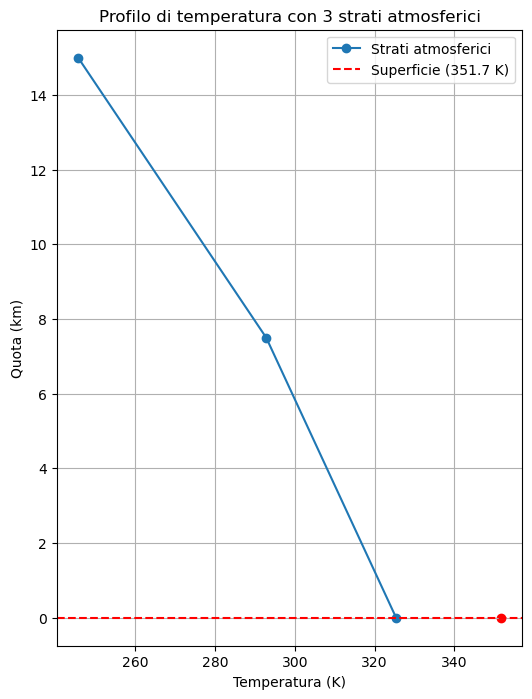

In [42]:
# Plot del profilo di temperatura
plt.figure(figsize=(6, 8))
plt.plot(T_layers, altitude / 1000, marker='o', label='Strati atmosferici')  # Conversione in km
plt.axhline(y=0, color='r', linestyle='--', label=f'Superficie ({T_surf:.1f} K)')
plt.scatter(T_surf, 0, color='red')

plt.xlabel('Temperatura (K)')
plt.ylabel('Quota (km)')
plt.legend()
plt.title(f'Profilo di temperatura con {N} strati atmosferici')
plt.grid()
plt.show()